In [3]:
import sys
sys.path.append('..')

import pandas as pd
from plotter import Plotter
from processor import Processor

In [4]:
processor = Processor()
plotter = Plotter()

In [5]:
serial_kde = processor.read_csv_file('../data/raw/serial.csv')
simd_kde = processor.read_csv_file('../data/raw/simd.csv')
cuda_kde = processor.read_csv_file('../data/raw/cuda.csv')
mpi_kde = processor.read_csv_file('../data/raw/mpi.csv')

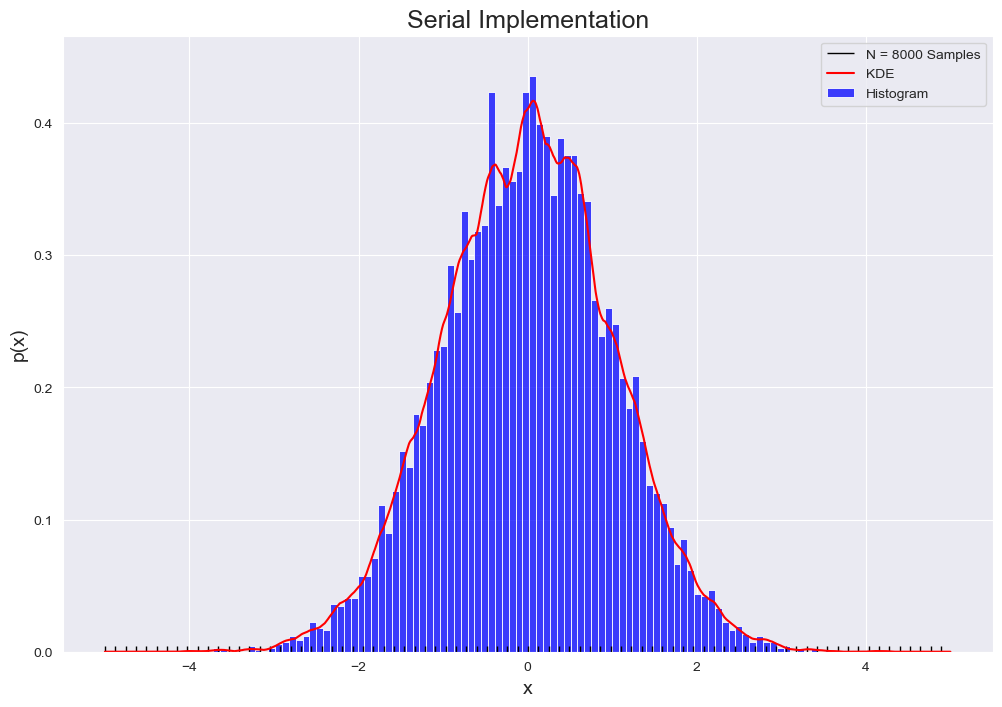

In [4]:
plotter.plot_single_kde(serial_kde, "Serial Implementation", hist=True, rug=True, kde=True)

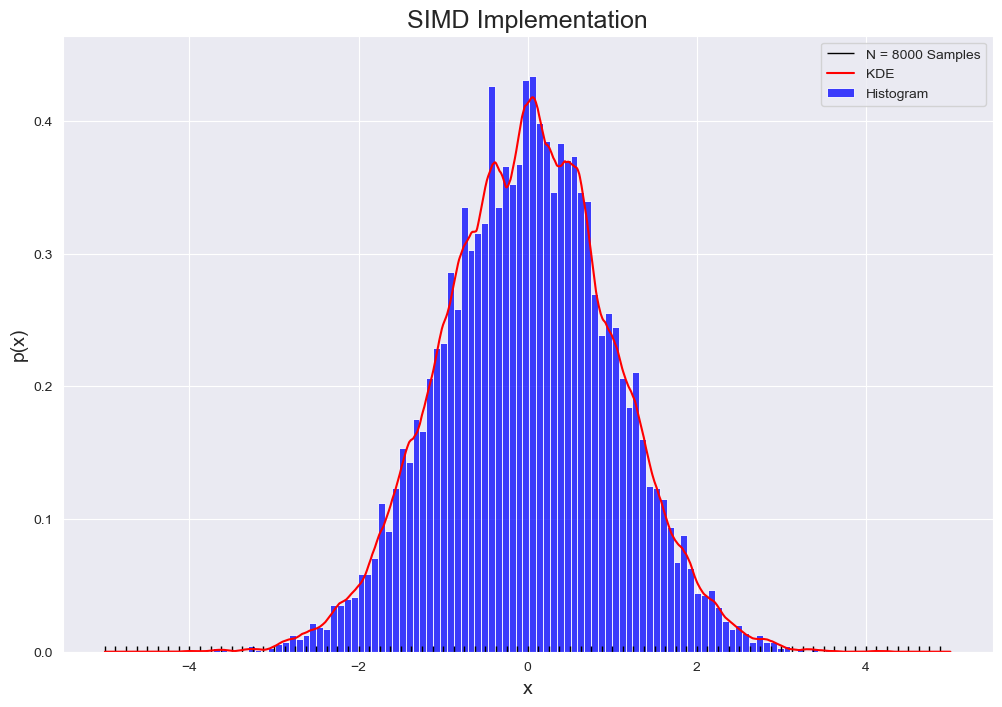

In [9]:
plotter.plot_single_kde(simd_kde, "SIMD Implementation", hist=True, rug=True, kde=True)

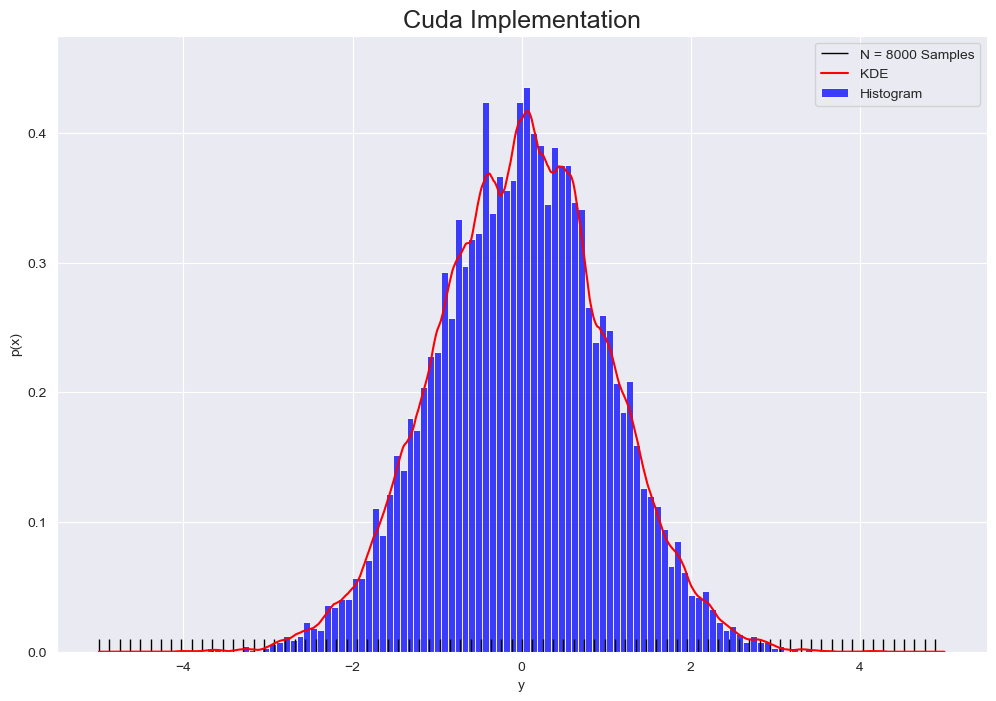

In [5]:
plotter.plot_single_kde(cuda_kde, "Cuda Implementation", hist=True, rug=True, kde=True)

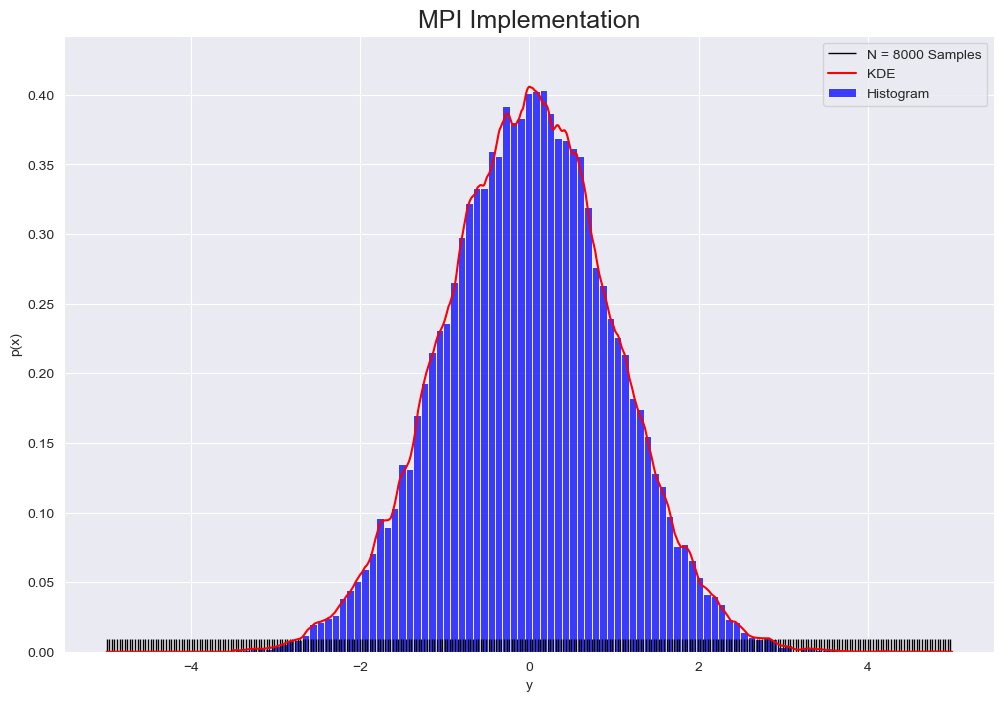

In [6]:
plotter.plot_single_kde(mpi_kde, "MPI Implementation", hist=True, rug=True, kde=True)

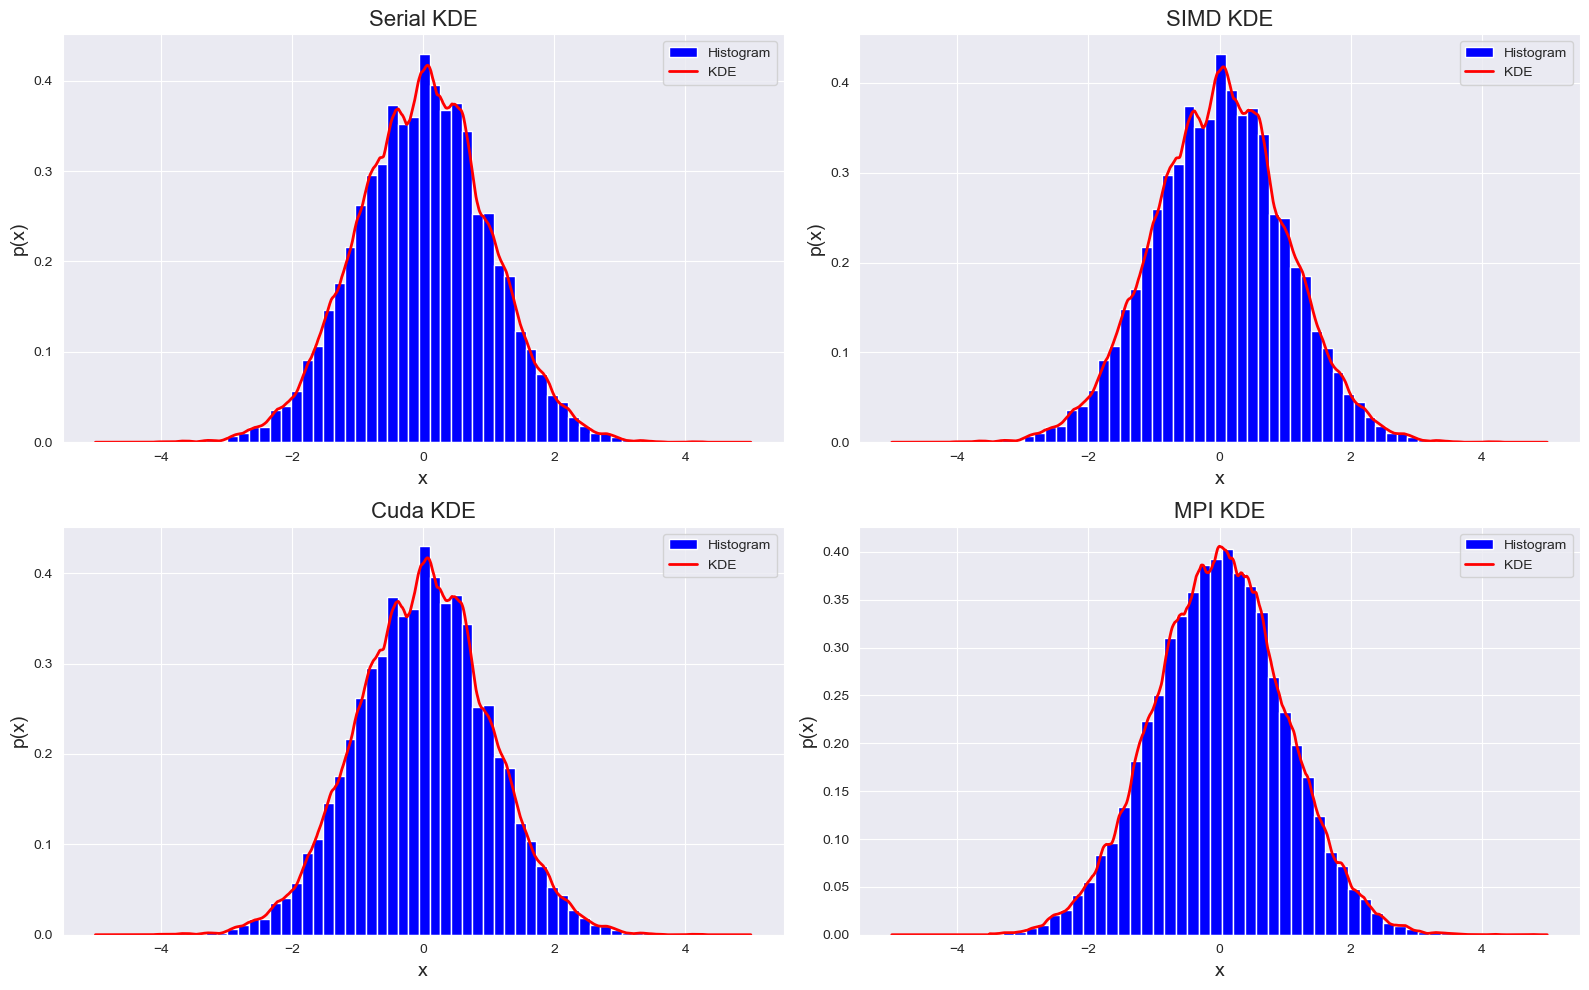

In [7]:
dfs = [serial_kde, simd_kde, cuda_kde, mpi_kde]
titles = ["Serial KDE", "SIMD KDE", "Cuda KDE", "MPI KDE"]

plotter.plot_multiple_kdes(dfs, titles=titles, hist=True, kde=True, save=True, filename="multiple_kde_temp.png")

In [8]:
# Create a sample DataFrame with execution times
execution_times_df = pd.DataFrame({
    'num_cores': [1000, 5000, 10000, 20000],
    'num_points': [1000, 5000, 10000, 20000],
    'Serial': [0.5, 2.0, 4.5, 8.5],
    'SIMD': [0.3, 1.5, 3.0, 7.0],
    'MPI': [0.2, 1.0, 2.5, 6.0],
    'CUDA': [0.1, 0.5, 1.2, 3.0]
})

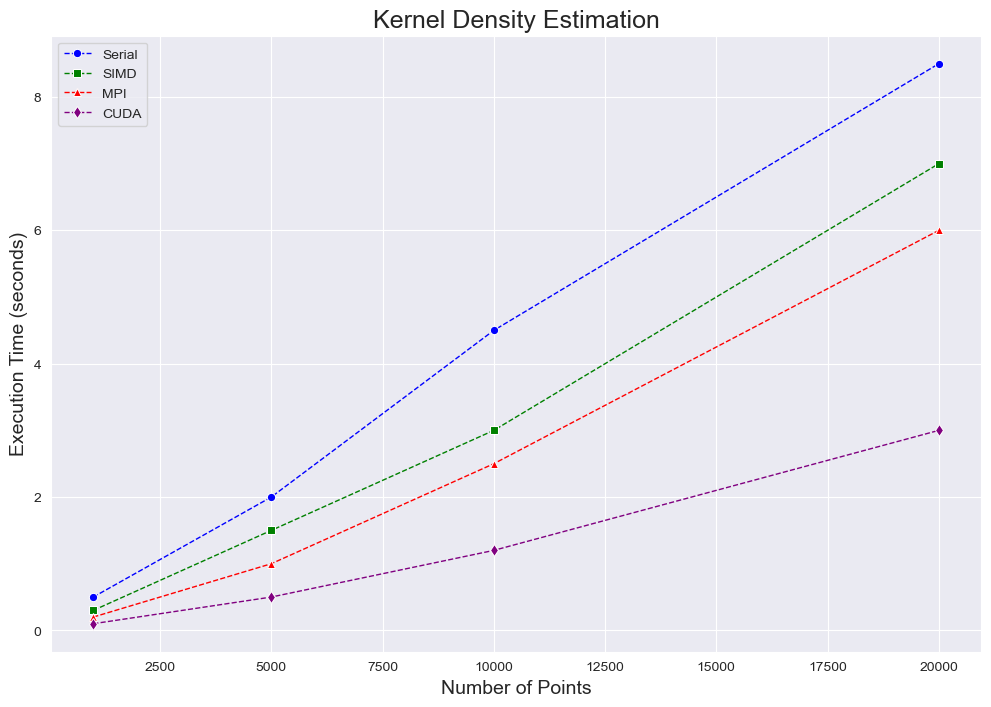

In [9]:
plotter.plot_execution_time(execution_times_df,'num_points',fig_size=(12,8),save=True,filename='execution_time_npoints_temp.png')

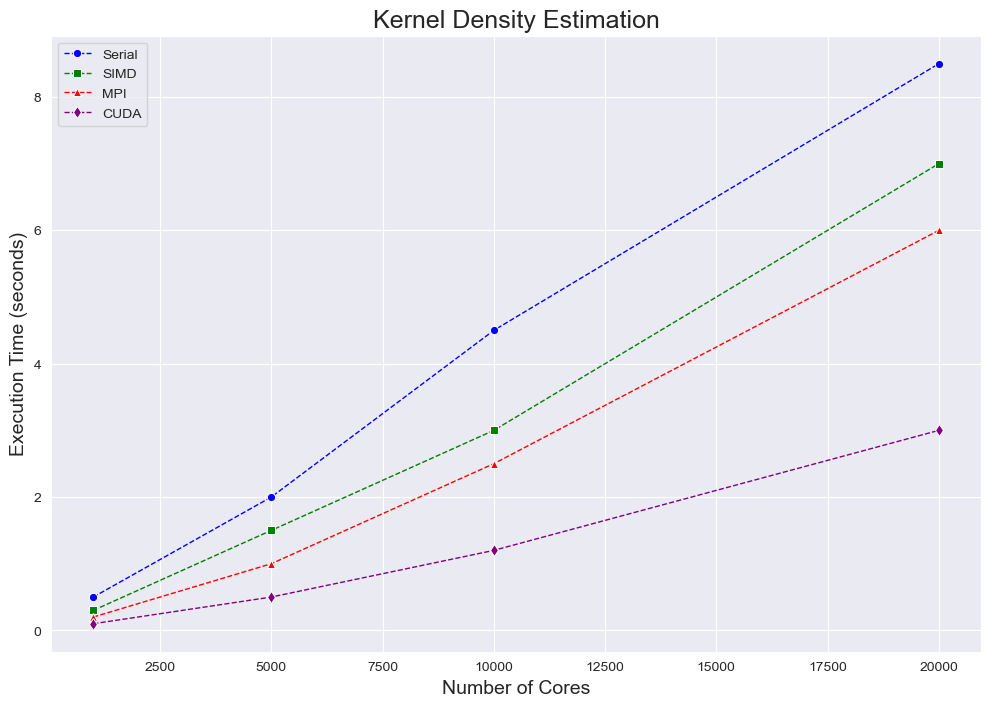

In [10]:
plotter.plot_execution_time(execution_times_df,'num_cores',fig_size=(12,8),save=True,filename='execution_time_ncores_temp.png')

In [12]:
import random
# Generate random data for 10 rows
num_cores = [i for i in range(1, 11)]
serial_time = [random.uniform(1.0, 10.0) for _ in range(10)]
parallel_time = [random.uniform(0.5, 5.0) for _ in range(10)]


mpi_scaling = processor.create_scaling_df(num_cores, serial_time, parallel_time)

# Generate random data for 10 rows
num_cores = [i for i in range(1, 11)]
serial_time = [random.uniform(1.0, 2.0) for _ in range(10)]
parallel_time = [random.uniform(0.5, 6.0) for _ in range(10)]

cuda_scaling = processor.create_scaling_df(num_cores, serial_time, parallel_time)

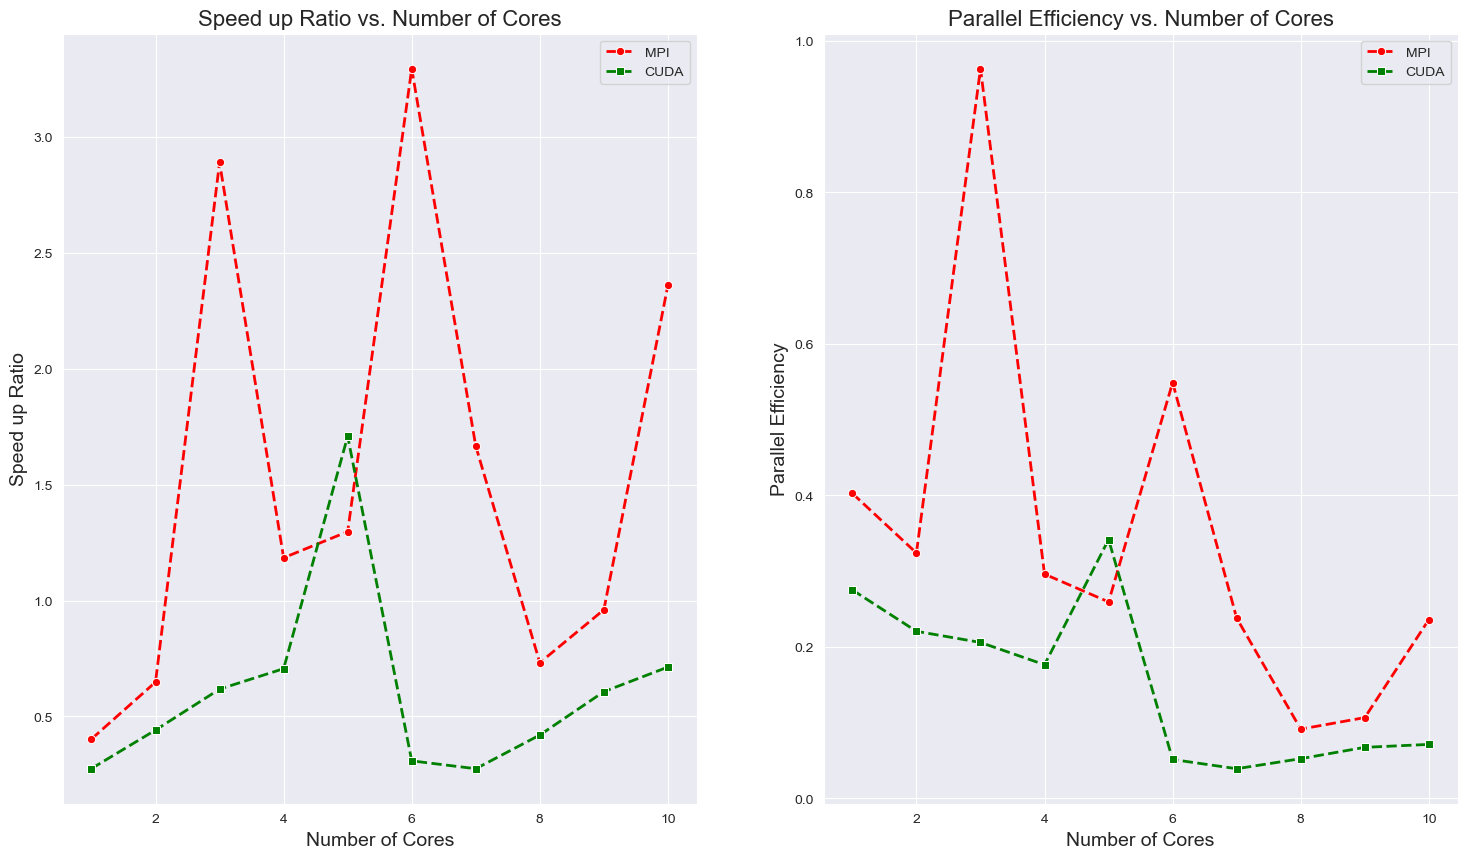

In [14]:
plotter.plot_speedup_efficiency(mpi_scaling, cuda_scaling,fig_size=(18,10),save=True, filename='speedup_efficiency.png')
